## Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Constants

In [2]:
DATA_DIR = "data/"
FILE_NAME = "ENB2012_data.xlsx"

INPUT_PATH  = os.path.join(DATA_DIR, FILE_NAME)

## Load the dataset and EDA

In [3]:
df = pd.read_excel(INPUT_PATH)

# Renaming the columns for better understanding
# Using the dataset description
df.rename(columns={
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load',
    }, inplace=True)

### Understanding the data structure

In [4]:
print(df.shape)
df.tail()

(768, 10)


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [5]:
# Check column information
df.info()

print("Has missing data" if df.isnull().values.any() else "No missing data")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
No missing data


In [6]:
# All data are numbers. Check on the numeric statistics
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
# Check if any duplicate data is there
df.duplicated().sum()

np.int64(0)

In [8]:
# Check unique values in each column
df.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 587
Cooling Load                 636
dtype: int64

In [9]:
TARGET_COLUMNS = ['Heating Load', 'Cooling Load']

### Categorical and Numerical Data

The dataset description and the original paper mentions that Orientation and Glazing Area Distribution are categorical features. The rest are numerical.

In [10]:
df['Orientation'] = df['Orientation'] .astype('category')
df['Glazing Area Distribution'] = df['Glazing Area Distribution'].astype('category')

In [11]:
numeric_columns = list(df.columns)
numeric_columns.remove('Orientation')
numeric_columns.remove('Glazing Area Distribution')

categorical_columns = ['Orientation', 'Glazing_Area_Distribution']

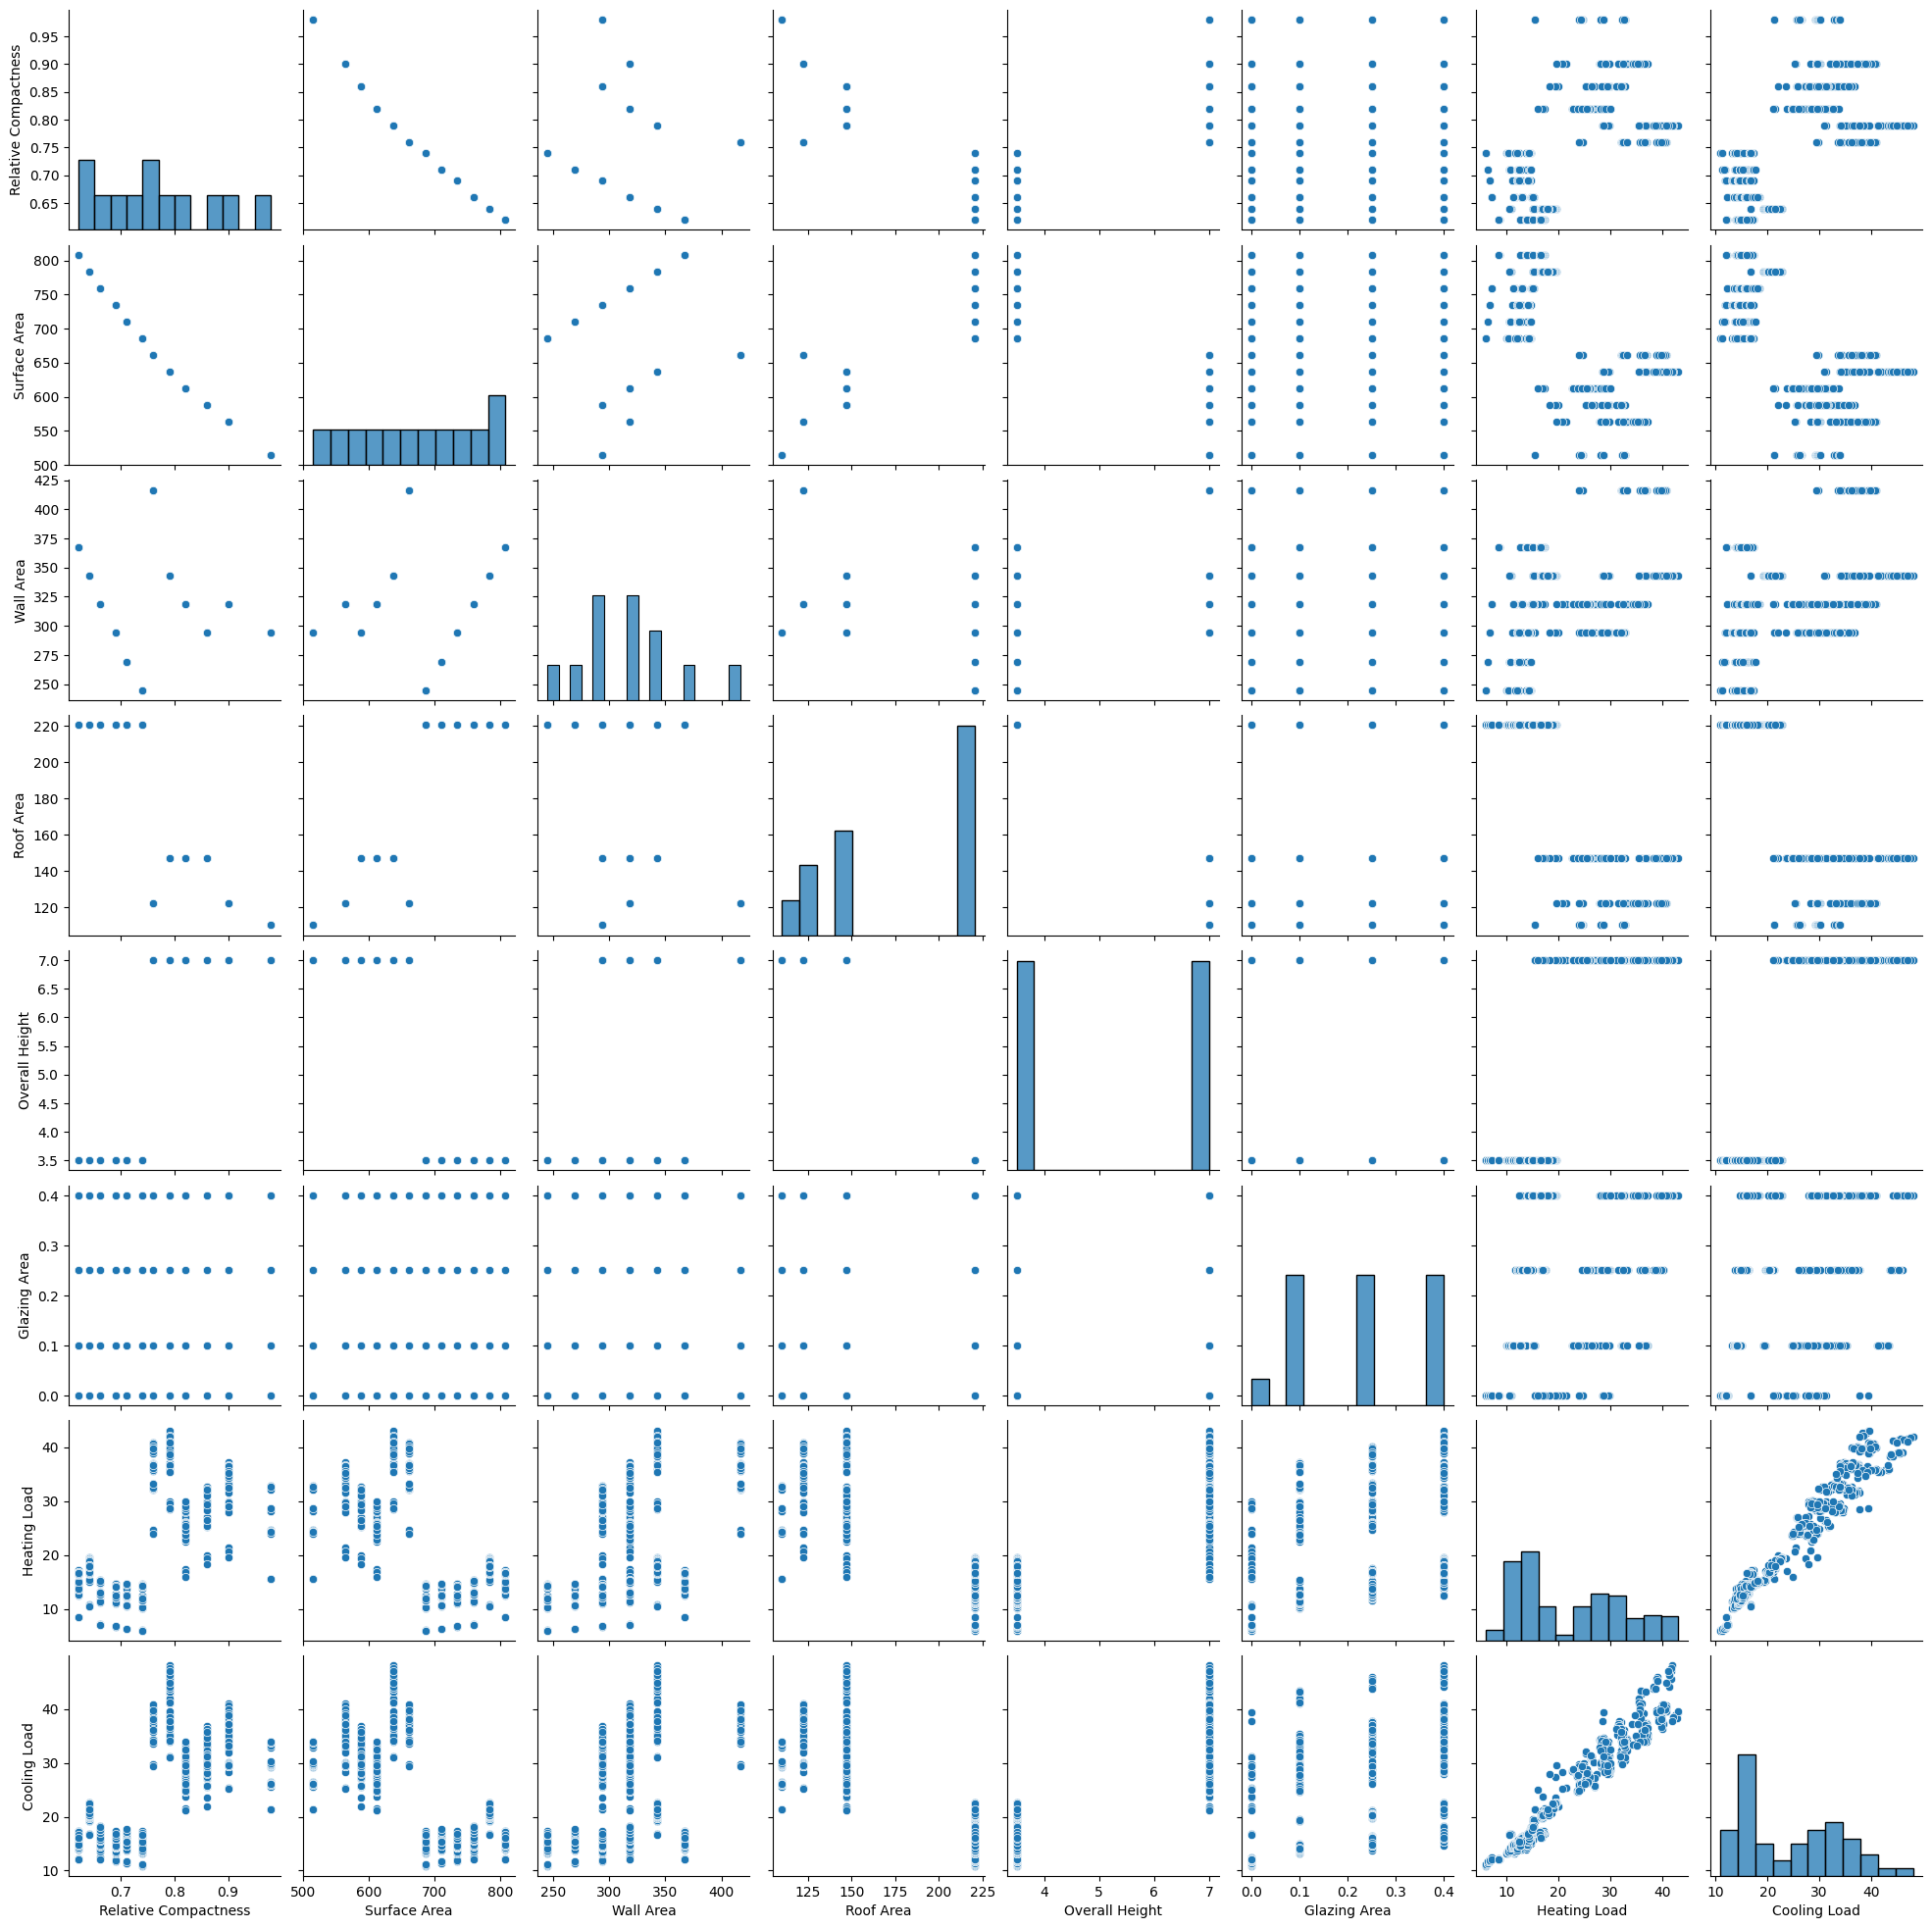

In [12]:
sns.pairplot(df)

### Univariate Analysis

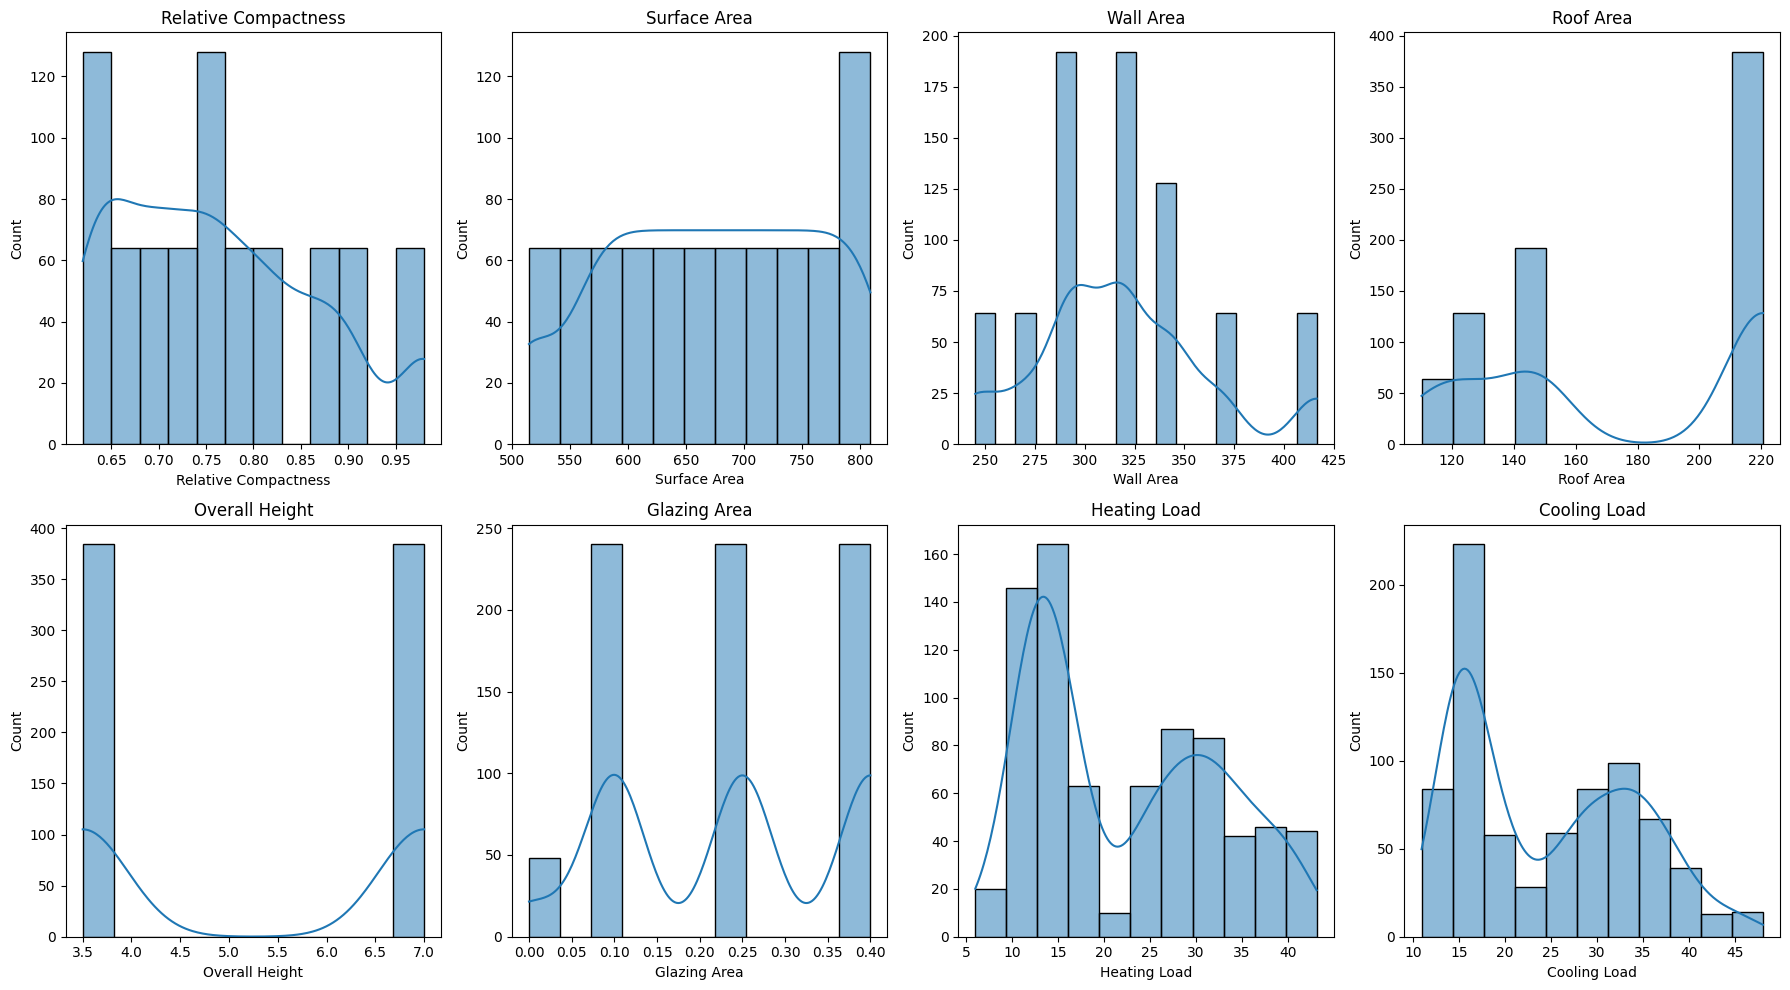

In [13]:
fig, axs = plt.subplots(2,4, figsize=(18, 10))
plot_idx = 0
for column in numeric_columns:
    ax = axs[plot_idx // 4, plot_idx % 4]
    sns.histplot(data=df[column], fill=True, ax=ax, kde=True)
    ax.set_title(column)
    plot_idx += 1

plt.tight_layout()
plt.show()

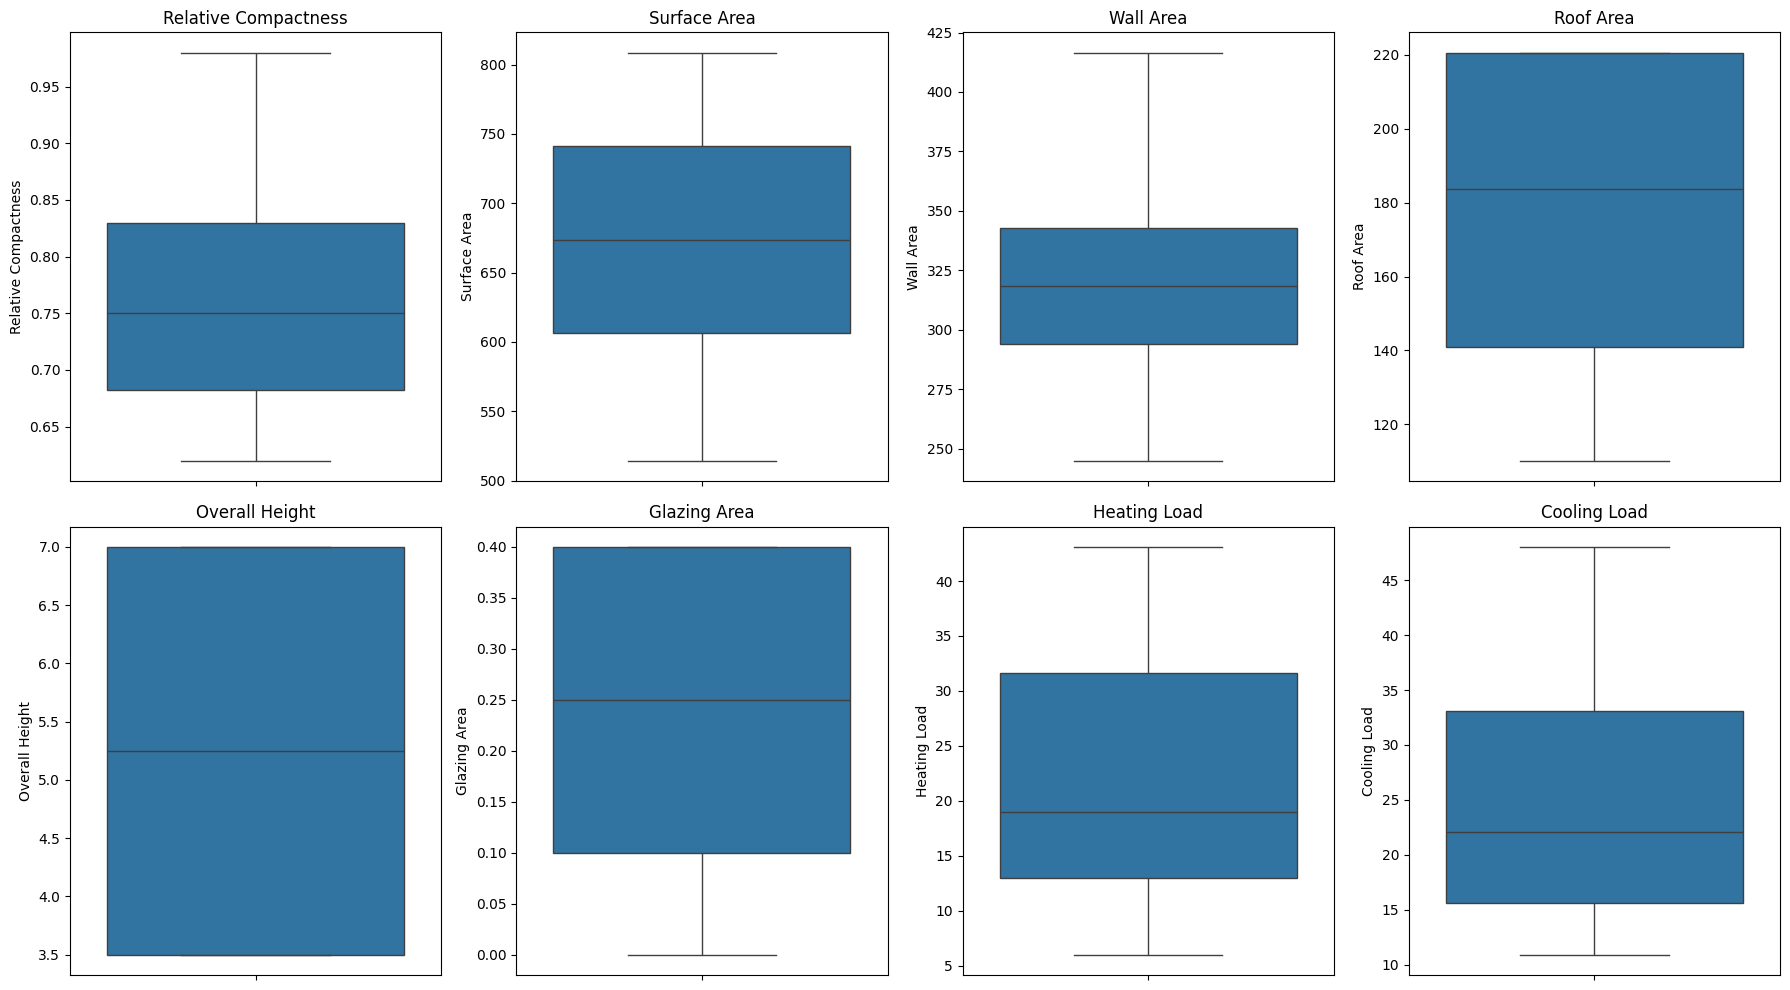

In [14]:
fig, axs = plt.subplots(2,4, figsize=(18, 10))
plot_idx = 0
for column in numeric_columns:
    ax = axs[plot_idx // 4, plot_idx % 4]
    sns.boxplot(data=df[column], ax=ax)
    ax.set_title(column)
    plot_idx += 1

plt.tight_layout()
plt.show()

## Merge the Heating Load and Cooling Load as Combined Load

In [15]:
df['Combined Load'] = df['Heating Load'] + df['Cooling Load']
df.drop(columns=TARGET_COLUMNS, inplace=True)

df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Combined Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,36.88
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,36.88
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,36.88
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,36.88
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,49.12


## Save the modified dataset

In [16]:
df.to_csv(os.path.join(DATA_DIR, 'clean_data.csv'), index=False)